### Practical Task:


•	Load a suitable dataset from the sklearn library.

•	Perform feature selection using the correlation method to identify the most relevant features for predicting the target variable.

•	Build and train a Linear Regression model using those selected features.

•	Evaluate your model’s performance (e.g., using R² score or Mean Squared Error).


### From the SKLEARN Library i chose to work with the Diabetes dataset
The sklearn (scikit-learn) library comes with several built-in toy datasets that can be used for quick experiments and assignments. This dataset Diabetes is suitable for Linear Regression.

The Diabetes dataset contains:



| Column   | Description                                                           |
| :------- | :-------------------------------------------------------------------- |
| `age`    | Age of the patient (normalized)                                       |
| `sex`    | Sex (normalized)                                                      |
| `bmi`    | Body mass index — a measure of body fat based on height and weight    |
| `bp`     | Average blood pressure                                                |
| `s1`     | Total serum cholesterol                                               |
| `s2`     | Low-density lipoproteins (LDL)                                        |
| `s3`     | High-density lipoproteins (HDL)                                       |
| `s4`     | Total cholesterol / HDL ratio                                         |
| `s5`     | Logarithm of serum triglycerides level                                |
| `s6`     | Blood sugar level                                                     |
| `Target` | A quantitative measure of disease progression one year after baseline |


In [1]:
#import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# load a suitable dataset from the sklearn library
from sklearn import datasets

In [3]:
diabetes_data = datasets.load_diabetes()
print(diabetes_data)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [4]:
# Convert features and targets to DataFrame
df = pd.DataFrame(data = diabetes_data.data, columns = diabetes_data.feature_names)
df['Target'] = diabetes_data['target']

In [5]:
#display the dataset
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [6]:
# Check the shape (number of rows and columns).
df.shape

(442, 11)

In [7]:
#Summarize the dataset (basic statistics like mean, min, max).
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


### Task 2
• Perform feature selection using the correlation method to identify the most relevant features for predicting the target variable.

In [8]:
# Compute correlation matrix
corr_matrix = df.corr()

# Extract correlation with Target only
target_corr = corr_matrix['Target'].sort_values(ascending=False)

print(target_corr)

Target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: Target, dtype: float64


In [9]:
target_corr = target_corr.drop('Target')
target_corr

bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
s3    -0.394789
Name: Target, dtype: float64

In [10]:
# Setting the threshold value
threshold_value = 0.4

In [11]:
# Select top correlated features
selected_features = target_corr[abs(target_corr) > 0.4].index.tolist()
print("Selected Features based on correlation:\n", selected_features)

Selected Features based on correlation:
 ['bmi', 's5', 'bp', 's4']


### Split the Data

In [12]:
# Seperate the features from the target variable
X = df[selected_features]
y = df['Target']

In [13]:
# Split the data and assign percentage used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [14]:
X_test

,bmi,s5,bp,s4
192,-0.030996,-0.029526,0.008101,-0.039493
337,-0.012673,0.005386,0.070072,0.034309
56,0.041218,0.033654,-0.026328,0.002943
9,0.039062,0.067737,-0.033213,-0.002592
232,0.000261,0.024055,-0.011420,0.056081
...,...,...,...,...
256,0.160855,0.028020,-0.046985,0.034309
304,-0.038540,-0.022517,0.052858,0.071210
358,-0.084886,-0.082379,-0.026328,-0.051671
198,0.054152,-0.074093,-0.026328,-0.039493


In [15]:
y_test

192     91.0
337     91.0
56      52.0
9      310.0
232    259.0
       ...  
256    346.0
304    253.0
358     90.0
198    142.0
289     68.0
Name: Target, Length: 89, dtype: float64

### Task 3
•	Build and train a Linear Regression model using those selected features.


In [16]:
#initialize the algorithm
LR = LinearRegression()

#Fit the algorithm on the training data
LR.fit(X_train, y_train)

LinearRegression()

In [17]:
# Make new predictions
y_preds = LR.predict(X_test)

In [18]:
y_preds

array([116.1964698 , 162.79107568, 188.91317062, 203.92615916,
       162.74867758, 197.93515277, 167.21549174,  96.53051463,
       152.64247736, 120.82366243, 191.72616876,  97.23299713,
        53.78643647, 175.33918302,  59.61147773, 181.19412801,
       120.73290732, 141.07579529,  70.84041317, 161.24578662,
        92.02231201, 231.23294705, 138.92971948, 104.30528864,
        68.04353952, 178.54323868, 157.60592834, 112.94393584,
       163.77925075,  94.73296399, 148.05325336, 133.86647897,
       115.68975785, 165.02539522,  93.75289274,  83.87819571,
       124.07047517,  94.22070025, 195.28046464, 135.90025463,
       143.8757952 ,  70.00793322, 152.39692956, 143.65898154,
       220.6856067 , 125.99020391,  87.45391236, 155.05247185,
       116.46627791, 281.45999051, 211.98679266, 174.73575948,
       215.22633988, 214.86988903, 142.48517797, 234.02750363,
       131.56372223, 144.14007076, 126.70312773, 144.7099618 ,
       151.68825278,  77.34506996, 194.80143078, 204.68

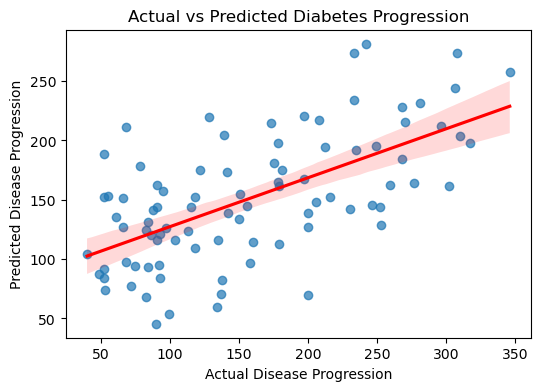

In [19]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(6, 4))
sns.regplot(x=y_test, y=y_preds, line_kws={"color": "red"}, scatter_kws={'alpha':0.7})
plt.xlabel("Actual Disease Progression")
plt.ylabel("Predicted Disease Progression")
plt.title("Actual vs Predicted Diabetes Progression")
plt.show()

The blue dots show how well predictions align with actual values.

The red line represents the perfect fit line (where Actual = Predicted).

The closer the dots are to that line, the better the model is performing.

### Task 4
•	Evaluate your model’s performance (e.g., using R² score or Mean Squared Error).

In [20]:
mae = mean_absolute_error(y_test,y_preds)
r_squared = r2_score(y_test,y_preds)  

In [21]:
print("Mean_Absolute_Error:", mae)
print("r2_score:", r_squared)

Mean_Absolute_Error: 51.98401455775713
r2_score: 0.3778627808443401


MAE = 52
On average, your model’s predictions are off by about 52 units from the actual diabetes progression score.

️R² = 0.38
This means your model explains only 37.8% of the variation in the target variable.